In [1]:
from SQLite_handler import *
from my_weapon import *
from tqdm import tqdm_notebook as tqdm
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)

In [2]:
data = pd.read_csv("web/data/2019-05-14/p1.csv", usecols=["dt", "Cristina (AI)", "Macri (AI)"]).set_index("dt")
data = data.dropna()
data.index = pd.to_datetime(data.index)

In [6]:
sess = get_session()

new_r = []
for dt, r in data.iterrows():
    new_r.append(
        Percent(dt=dt, K=r["Cristina (AI)"], M=r["Macri (AI)"])
    )
sess.add_all(new_r)

sess.commit()
sess.close()

In [3]:
import pendulum

new_data = []
for i, row in data.iterrows():
    i = pendulum.instance(i)
    if i.day_of_week == 1:
        new_data.append(row)

new_data = pd.DataFrame(new_data)

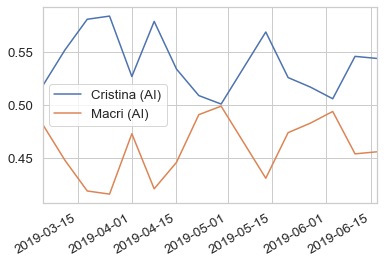

In [4]:
new_data.plot()

In [5]:
X = new_data["Macri (AI)"]
X

2019-03-04    0.482
2019-03-11    0.448
2019-03-18    0.419
2019-03-25    0.416
2019-04-01    0.473
2019-04-08    0.421
2019-04-15    0.446
2019-04-22    0.491
2019-04-29    0.499
2019-05-13    0.431
2019-05-20    0.474
2019-05-27    0.483
2019-06-03    0.494
2019-06-10    0.454
2019-06-17    0.456
Name: Macri (AI), dtype: float64

In [6]:
data = pd.read_csv("data/processed_positive.csv", usecols=["dt", "PK", "PM"]).set_index("dt")
# data.index = pd.to_datetime(data.index)
data

,PM,PK
dt,,
2019-02-25,0.444,0.556
2019-03-04,0.401,0.599
2019-03-11,0.432,0.568
2019-03-18,0.409,0.591
2019-03-25,0.422,0.578
2019-04-01,0.389,0.611
2019-04-08,0.398,0.602
2019-04-15,0.418,0.582
2019-04-22,0.411,0.589


In [27]:
import pendulum

new_data1 = []
for i, row in data.iterrows():
    i = pendulum.parse(i)
    i = i.add(days=7)
    i = pendulum.instance(i).to_date_string()
    # print(i)
    row = dict(row)
    row["dt"] = i
    new_data1.append(row)

# print(new_data1)
new_data1 = pd.DataFrame(new_data1).set_index("dt")
new_data1.index = pd.to_datetime(new_data1.index)

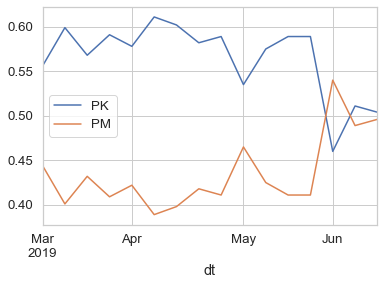

In [28]:
new_data1.plot()

In [29]:
E = new_data1["PM"]
E

dt
2019-03-04    0.444
2019-03-11    0.401
2019-03-18    0.432
2019-03-25    0.409
2019-04-01    0.422
2019-04-08    0.389
2019-04-15    0.398
2019-04-22    0.418
2019-04-29    0.411
2019-05-06    0.465
2019-05-13    0.425
2019-05-20    0.411
2019-05-27    0.411
2019-06-03    0.540
2019-06-10    0.489
2019-06-17    0.496
Name: PM, dtype: float64

In [10]:
X.shift(1)

2019-03-04      NaN
2019-03-11    0.482
2019-03-18    0.448
2019-03-25    0.419
2019-04-01    0.416
2019-04-08    0.473
2019-04-15    0.421
2019-04-22    0.446
2019-04-29    0.491
2019-05-13    0.499
2019-05-20    0.431
2019-05-27    0.474
2019-06-03    0.483
2019-06-10    0.494
2019-06-17    0.454
Name: Macri (AI), dtype: float64

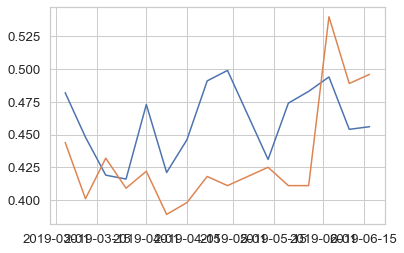

In [11]:
plt.plot(X)
plt.plot(E)

In [15]:
def linear(input_x, input_y):
    '''
    线性回归
    :param x:
    :param y:
    :return: 拟合参数
    '''
    from sklearn.linear_model import LinearRegression
    clf = LinearRegression()
    X = [[i] for i in input_x]
    y = input_y
    clf.fit(X, y)
    return clf.coef_[0], clf.intercept_, clf.score(X, y)

In [15]:
linear(X, E)

(0.4335427459621654, 0.2340127405705712, 0.08451640981118869)

In [16]:
fit0 = X * 0.4335 + 0.2340

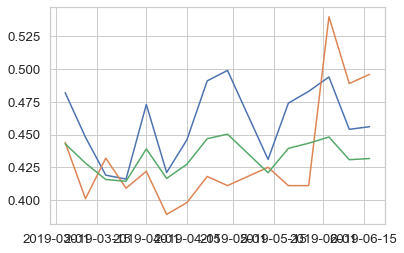

In [17]:
plt.plot(X)
plt.plot(E)
plt.plot(fit0)

In [18]:
E_1 = E.shift(-1).dropna()
X_1 = X.iloc[:-1]

In [19]:
linear(X_1, E_1)

(0.44834802938791923, 0.2263338445004494, 0.09076327419599595)

In [20]:
fit1 = X_1 * 0.4483 + 0.2263

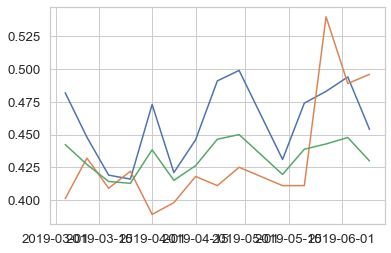

In [210]:
plt.plot(X_1)
plt.plot(E_1)
plt.plot(fit1)

In [23]:
E_2 = E.shift(-2).dropna()
print(E_2)
X_2 = X.iloc[:-2]
print(X_2)
linear(X_2, E_2)

dt
2019-03-04    0.432
2019-03-11    0.409
2019-03-18    0.422
2019-03-25    0.389
2019-04-01    0.398
2019-04-08    0.418
2019-04-15    0.411
2019-04-22    0.425
2019-04-29    0.411
2019-05-13    0.411
2019-05-20    0.540
2019-05-27    0.489
2019-06-03    0.496
Name: PM, dtype: float64
2019-03-04    0.482
2019-03-11    0.448
2019-03-18    0.419
2019-03-25    0.416
2019-04-01    0.473
2019-04-08    0.421
2019-04-15    0.446
2019-04-22    0.491
2019-04-29    0.499
2019-05-13    0.431
2019-05-20    0.474
2019-05-27    0.483
2019-06-03    0.494
Name: Macri (AI), dtype: float64


(0.666655355421932, 0.12818468774177788, 0.20887122560025537)

In [24]:
fit2 = X * 0.6666 + 0.1281

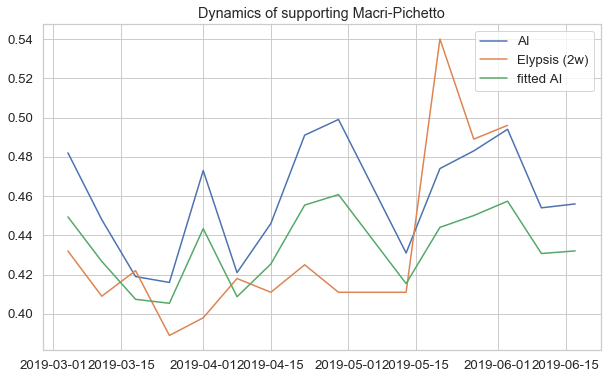

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(X, label="AI")
plt.plot(E_2, label="Elypsis (2w)")
plt.plot(fit2, label="fitted AI")
plt.title("Dynamics of supporting Macri-Pichetto")
plt.legend()

In [30]:
E

dt
2019-03-04    0.444
2019-03-11    0.401
2019-03-18    0.432
2019-03-25    0.409
2019-04-01    0.422
2019-04-08    0.389
2019-04-15    0.398
2019-04-22    0.418
2019-04-29    0.411
2019-05-06    0.465
2019-05-13    0.425
2019-05-20    0.411
2019-05-27    0.411
2019-06-03    0.540
2019-06-10    0.489
2019-06-17    0.496
Name: PM, dtype: float64

In [123]:
data = pd.read_csv("data/for_fitting.csv").set_index("dt")

In [124]:
data.index = pd.to_datetime(data.index)

In [125]:
X0 = []
for i, row in data.iterrows():
    i = pendulum.instance(i)
#     if i.day_of_week == 1:
        # print(i, row)
    X0.append(row)

X0 = pd.DataFrame(X0)

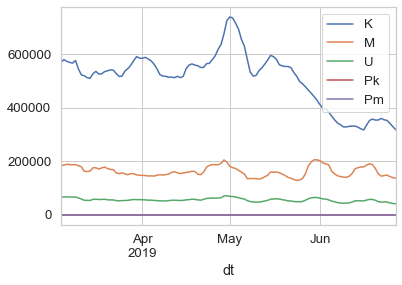

In [126]:
data.plot()

In [99]:
X0 = X0["Pm"]

In [113]:
fit = X0 * K[0] + K[1]
fit_K = 1 - fit

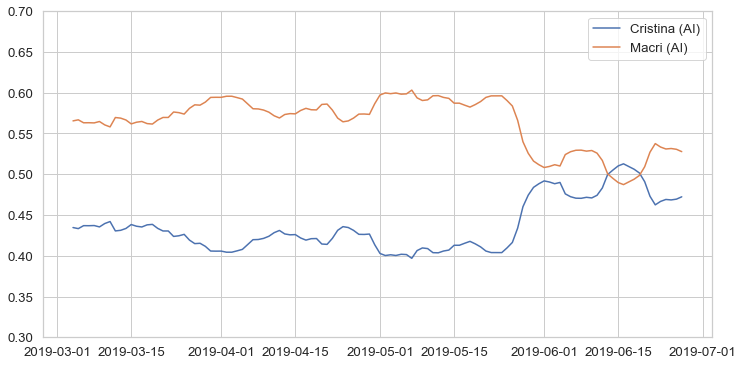

In [118]:
plt.figure(figsize=(12, 6))
plt.ylim((0.3, 0.7))
plt.plot(fit, label="Cristina (AI)")
plt.plot(fit_K, label="Macri (AI)")
plt.legend()
plt.show()

In [119]:
fit

2019-03-04    0.434598
2019-03-05    0.433279
2019-03-06    0.436917
2019-03-07    0.436852
2019-03-08    0.437059
2019-03-09    0.435375
2019-03-10    0.439519
2019-03-11    0.441966
2019-03-12    0.430464
2019-03-13    0.431201
2019-03-14    0.433491
2019-03-15    0.438284
2019-03-16    0.436212
2019-03-17    0.435304
2019-03-18    0.437902
2019-03-19    0.438476
2019-03-20    0.433590
2019-03-21    0.430393
2019-03-22    0.430379
2019-03-23    0.423706
2019-03-24    0.424490
2019-03-25    0.426241
2019-03-26    0.419207
2019-03-27    0.414896
2019-03-28    0.415296
2019-03-29    0.411550
2019-03-30    0.405794
2019-03-31    0.405655
2019-04-01    0.405710
2019-04-02    0.404363
                ...   
2019-05-29    0.474342
2019-05-30    0.483889
2019-05-31    0.488284
2019-06-01    0.491793
2019-06-02    0.490472
2019-06-03    0.488346
2019-06-04    0.489915
2019-06-05    0.475902
2019-06-06    0.472411
2019-06-07    0.470611
2019-06-08    0.470461
2019-06-09    0.471688
2019-06-10 

In [61]:
X0, E

(2019-03-04    0.243980
 2019-03-11    0.254970
 2019-03-18    0.248908
 2019-03-25    0.231512
 2019-04-01    0.200885
 2019-04-08    0.222101
 2019-04-15    0.231092
 2019-04-22    0.224202
 2019-04-29    0.232073
 2019-05-06    0.194542
 2019-05-13    0.201031
 2019-05-20    0.208602
 2019-05-27    0.242922
 2019-06-03    0.324160
 2019-06-10    0.298173
 2019-06-17    0.355603
 2019-06-24    0.295367
 Name: Pm, dtype: float64, dt
 2019-03-04    0.444
 2019-03-11    0.401
 2019-03-18    0.432
 2019-03-25    0.409
 2019-04-01    0.422
 2019-04-08    0.389
 2019-04-15    0.398
 2019-04-22    0.418
 2019-04-29    0.411
 2019-05-06    0.465
 2019-05-13    0.425
 2019-05-20    0.411
 2019-05-27    0.411
 2019-06-03    0.540
 2019-06-10    0.489
 2019-06-17    0.496
 Name: PM, dtype: float64)

In [63]:
X0 = X0[:-1]

In [88]:
K = linear(X0, E)
print(K)

(0.6703349051447496, 0.2710502097871096, 0.5253349086452317)


In [77]:
fit0 = X0 * K[0] + K[1]

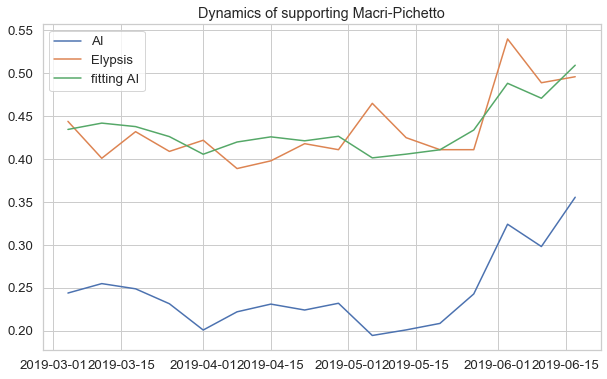

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(X0, label="AI")
plt.plot(E, label="Elypsis")
plt.plot(fit0, label="fitting AI")
plt.title("Dynamics of supporting Macri-Pichetto")
plt.legend()

In [83]:
E1 = E.shift(-1).dropna()
# print(E1)
X1 = X0.iloc[:-1]
# print(X1)
K = linear(X1, E1)
print(K)

(0.7385007327969716, 0.25923759057736406, 0.36613608255686725)


In [84]:
fit1 = X1 * K[0] + K[1]

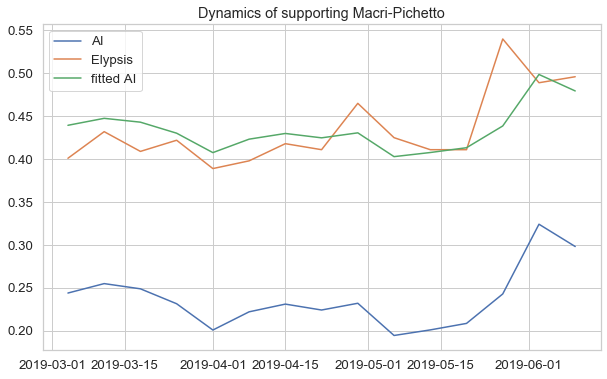

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(X1, label="AI")
plt.plot(E1, label="Elypsis")
plt.plot(fit1, label="fitted AI")
plt.title("Dynamics of supporting Macri-Pichetto")
plt.legend()

In [2]:
data = pd.read_csv("web/data/2019-05-14/lag7.csv")

In [3]:
data

,dt,Macri (AI),Elypsis (14-days in advance)
0,2019-03-11,-7.05,NaN
1,2019-03-18,-6.47,NaN
2,2019-03-25,-0.72,NaN
3,2019-04-01,13.70,NaN
4,2019-04-08,-10.99,NaN
5,2019-04-15,10.69,NaN
6,2019-04-22,5.36,NaN
7,2019-04-29,1.63,NaN
8,2019-05-13,-10.42,NaN
9,2019-05-20,6.04,NaN


In [9]:
data["Macri (AI)"].dropna()[2:]

2     -0.72
3     13.70
4    -10.99
5     10.69
6      5.36
7      1.63
8    -10.42
9      6.04
10     9.49
11    -5.78
12   -11.45
13    32.33
Name: Macri (AI), dtype: float64

In [20]:
x1 = np.array([
-0.72,
13.70,
-10.99,
10.69,
5.36,
1.63,
-10.42,
6.04,
9.49,
-5.78,
-11.45,
32.33,
])

In [6]:
data["Elypsis (14-days in advance)"].dropna()

28    -9.23
29     6.95
30    -5.34
31     4.41
32    -9.15
33     2.58
34     4.28
35    -0.72
36    13.14
37    -7.74
38    -5.13
39     1.23
40    30.58
Name: Elypsis (14-days in advance), dtype: float64

In [21]:
x2 = np.array([
-9.23,
6.95,
-5.34,
4.41,
-9.15,
2.58,
-0.72,
13.14,
-7.74,
-5.13,
1.23,
30.58,  
])

In [22]:
linear(x1, x2)

(0.6274955793550986, -0.28704364205677746, 0.48684928538666555)

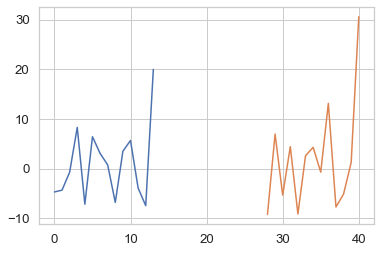

In [26]:
plt.plot(data["Macri (AI)"].dropna() * 0.627 - 0.287)
plt.plot(data["Elypsis (14-days in advance)"])

In [96]:
data = pd.read_csv("web/data/2019-05-14/positive.csv").set_index("dt")
data.index = pd.to_datetime(data.index)

In [97]:
data = data[data.index.dayofweek == 0]

In [98]:
M = data["Macri (AI)"].dropna()
M

dt
2019-03-04    0.482
2019-03-11    0.448
2019-03-18    0.419
2019-03-25    0.416
2019-04-01    0.473
2019-04-08    0.421
2019-04-15    0.446
2019-04-22    0.491
2019-04-29    0.499
2019-05-13    0.431
2019-05-20    0.474
2019-05-27    0.483
2019-06-03    0.494
2019-06-10    0.454
2019-06-17    0.456
2019-06-24    0.459
2019-07-01    0.488
2019-07-08    0.472
Name: Macri (AI), dtype: float64

In [99]:
E = data["Macri (Elypsis)"].dropna()
E

dt
2019-03-04    0.444
2019-03-11    0.403
2019-03-18    0.431
2019-03-25    0.408
2019-04-01    0.426
2019-04-08    0.387
2019-04-15    0.397
2019-04-22    0.414
2019-04-29    0.411
2019-05-06    0.465
2019-05-13    0.429
2019-05-20    0.407
2019-05-27    0.412
2019-06-03    0.538
2019-06-10    0.487
2019-06-17    0.494
2019-06-24    0.500
Name: Macri (Elypsis), dtype: float64

In [100]:
x1 = [
0.482,
0.448,
0.419,
0.416,
0.473,
0.421,
0.446,
0.491,
0.499,
0.431,
0.474,
0.483,
0.494,
0.454,
0.456,
0.459,
]

In [101]:
x2 = [
0.444,
0.403,
0.431,
0.408,
0.426,
0.387,
0.397,
0.414,
0.411,
# 0.465,
0.429,
0.407,
0.412,
0.538,
0.487,
0.494,
0.500,
]

In [102]:
A = linear(x1, x2)
A

(0.42199415423158954, 0.24300193393842143, 0.06981847104562244)

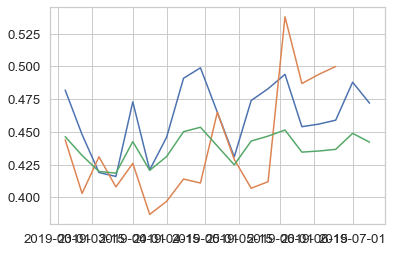

In [103]:
data = data.sort_index()
plt.plot_date(M.index, M, "-")
plt.plot_date(E.index, E, "-")
plt.plot_date(M.index, M * A[0] + A[1], "-")

# plt.plot_date(data.index, data["Macri (AI)"] * A[0] + A[1], "-")
# plt.plot_date(data.index, data["Macri (Elypsis)"], "--")

In [104]:
A = linear(x1[:-1], x2[1:])
A

(0.4439684474554027, 0.23242595349164277, 0.07742853713276476)

In [105]:
A = linear(x1[:-2], x2[2:])
A

(0.6206469615933332, 0.15354424214237677, 0.15763068063582975)

## Updates on July 20, fitting plot(1) in web

In [27]:
data = pd.read_csv("web/data/2019-05-14/p1.csv").set_index("dt")
data.index = pd.to_datetime(data.index)

In [28]:
data = data[["Fernandez (AI)", "Macri (AI)", "Fernandez (Aggregate Polls)", "Macri (Aggregate Polls)"]]
data = data.dropna(how="all")

In [29]:
Mp = data["Macri (AI)"].dropna()
Ma = data["Macri (Aggregate Polls)"].dropna()

In [30]:
M = pd.DataFrame(index=pd.date_range(start='3/1/2019', end='7/1/2019'))

In [31]:
M["Mp"] = np.NaN
M["Ma"] = np.NaN

In [32]:
M["Mp"] = Mp
M["Ma"] = Ma

In [33]:
MI = M.interpolate(method="time")

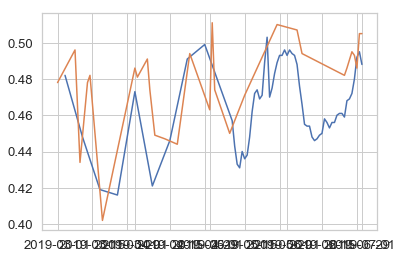

In [34]:
plt.plot(MI)

In [35]:
MI = MI.dropna()

In [36]:
from sklearn.linear_model import LinearRegression

def linear(input_x, input_y):
    # print(input_x.shape, input_y.shape)
    clf = LinearRegression()
    X = [[i] for i in input_x]
    clf.fit(X, input_y)
    return clf.coef_[0], clf.intercept_, clf.score(X, input_y)

In [37]:
Mp = MI.Mp
Ma = MI.Ma

for i in range(0, 15):
#     print(Mp[:-i], Ma[i: ])
    print(f"Lag: {i}")
    if i == 0:
        print(linear(Mp, Ma))
    else:
        print(linear(Mp[:-i], Ma[i: ]))

Lag: 0
(0.6878613088412687, 0.1578172482309767, 0.47477988563915335)
Lag: 1
(0.6983851034507896, 0.15303884489382164, 0.4848733839100219)
Lag: 2
(0.6863818184041369, 0.15864864200647777, 0.4612626926931998)
Lag: 3
(0.6520250941549874, 0.17448939215643222, 0.4114462114848778)
Lag: 4
(0.5945724757962609, 0.20083891532483023, 0.3418408795907746)
Lag: 5
(0.5194181115494274, 0.23523985141312262, 0.2621424166068108)
Lag: 6
(0.4389149017547642, 0.2723391235483642, 0.18713720628822594)
Lag: 7
(0.36553988695897677, 0.3064242657201499, 0.13284083084118714)
Lag: 8
(0.29145589451963966, 0.34067604006184493, 0.08531698467236226)
Lag: 9
(0.21444325212836837, 0.37614901603157014, 0.04627475682727589)
Lag: 10
(0.1348353360617045, 0.4126799363531181, 0.018297133925735953)
Lag: 11
(0.05560838922216718, 0.4489956153897653, 0.0031147570510781097)
Lag: 12
(-0.00940526114510432, 0.47893047729200033, 8.918879534602908e-05)
Lag: 13
(-0.058937896267274706, 0.5019101405258194, 0.00353531078068825)
Lag: 14
(-0.0

In [38]:
M_rescaled = MI.Mp * 0.6983851034507896 + 0.15303884489382164
MI["Macri (rescaled AI)"] = M_rescaled
MI["Macri (rescaled AI)"] = MI["Macri (rescaled AI)"].shift(1)

In [53]:
import sklearn

sklearn.metrics.mean_squared_error(Ma.to_list()[1: ], MI["Macri (rescaled AI)"].to_list()[1: ])

0.0002959444202243957

In [54]:
stdev = np.sqrt(sum((Ma[1: ] - MI["Macri (rescaled AI)"][1: ])**2) / (len(MI["Macri (rescaled AI)"]) - 1 - 2))

In [56]:
stdev * 1.96

0.0340049154419868

In [39]:
csv = MI.dropna().round(3)
csv = csv.rename(columns={"Ma": "Macri (Interpolated aggregate polls)"})
csv["Fernandez (rescaled AI)"] = 1 - csv["Macri (rescaled AI)"]
csv["Fernandez (Interpolated aggregate polls)"] = 1 - csv["Macri (Interpolated aggregate polls)"]
csv = csv[["Fernandez (rescaled AI)", "Macri (rescaled AI)", "Fernandez (Interpolated aggregate polls)", "Macri (Interpolated aggregate polls)"]]

In [40]:
csv = csv.round(3)
csv.to_csv("data/fitting_0805.csv")

## Updates on July 20, fitting with Elypsis

In [102]:
data = pd.read_csv("web/data/2019-05-14/Ely-weekly.csv").set_index("dt")
data.index = pd.to_datetime(data.index)
data = data.dropna(how="all")
Mp = data["Macri (AI)"].dropna()
Ma = data["Macri (Elypsis)"].dropna()

M = pd.DataFrame(index=pd.date_range(start='3/4/2019', end='6/24/2019'))
M["Mp"] = np.NaN
M["Ma"] = np.NaN
M["Mp"] = Mp
M["Ma"] = Ma
MI = M.interpolate(method="time").dropna()
MI

,Mp,Ma
2019-03-04,0.482000,0.488000
2019-03-05,0.477143,0.488000
2019-03-06,0.472286,0.488000
2019-03-07,0.467429,0.488000
2019-03-08,0.462571,0.488000
2019-03-09,0.457714,0.488000
2019-03-10,0.452857,0.488000
2019-03-11,0.448000,0.488000
2019-03-12,0.443857,0.488857
2019-03-13,0.439714,0.489714


In [100]:
Mp = MI.Mp
Ma = MI.Ma

for i in range(0, 22):
#     print(Mp[:-i], Ma[i: ])
    print(f"Lag: {i}")
    if i == 0:
        print(linear(Mp, Ma))
    else:
        print(linear(Mp[:-i], Ma[i: ]))

Lag: 0
(-0.12123652947949717, 0.5500946100342299, 0.025119865277563602)
Lag: 1
(-0.11696350073160965, 0.5481897463136768, 0.023405896982520713)
Lag: 2
(-0.10964635750963223, 0.544885880364063, 0.020590947638378432)
Lag: 3
(-0.1005322937005833, 0.540758080148045, 0.017328916972748853)
Lag: 4
(-0.09220040972945334, 0.5369916652202549, 0.01459233113485392)
Lag: 5
(-0.0849338313317643, 0.5337188250020756, 0.012395473202059137)
Lag: 6
(-0.07978985531197895, 0.5314216155102484, 0.010950870095649656)
Lag: 7
(-0.07439897805329108, 0.5290140211454221, 0.009526958505244099)
Lag: 8
(-0.0700107844986281, 0.527065715995303, 0.008445378227172284)
Lag: 9
(-0.06752395074648171, 0.5259823762308343, 0.007863541747091807)
Lag: 10
(-0.0644848251710543, 0.52464308162596, 0.007167095376066745)
Lag: 11
(-0.0657733790783572, 0.525285449352091, 0.007447583646107314)
Lag: 12
(-0.07058406112218574, 0.5275410547458579, 0.008558705709300063)
Lag: 13
(-0.07792403217259021, 0.5309540155256723, 0.010402829981216999)


In [103]:
M_rescaled = MI.Mp * (-0.25670139581719714) +  0.6129199344921367
MI["Macri (rescaled AI)"] = M_rescaled
MI["Macri (rescaled AI)"] = MI["Macri (rescaled AI)"].shift(22)

In [104]:
csv = MI.dropna().round(3)
csv = csv.rename(columns={"Ma": "Macri (Voting Intention from Elypsis)"})
csv["Fernandez (rescaled AI)"] = 1 - csv["Macri (rescaled AI)"]
csv["Fernandez (Voting Intention from Elypsis)"] = 1 - csv["Macri (Voting Intention from Elypsis)"]
csv = csv[["Fernandez (rescaled AI)", "Macri (rescaled AI)", "Fernandez (Voting Intention from Elypsis)", "Macri (Voting Intention from Elypsis)"]]
csv = csv.round(3)
csv.to_csv("web/data/fitting_voting_08.csv")

In [83]:
data = pd.read_csv("web/data/2019-05-14/positive.csv").set_index("dt")
data.index = pd.to_datetime(data.index)
data = data.dropna(how="all")
Mp = data["Macri (AI)"].dropna()
Ma = data["Macri (Elypsis)"].dropna()

M = pd.DataFrame(index=pd.date_range(start='3/4/2019', end='7/29/2019'))
M["Mp"] = np.NaN
M["Ma"] = np.NaN
M["Mp"] = Mp
M["Ma"] = Ma
MI = M.interpolate(method="time").dropna()
MI

,Mp,Ma
2019-03-04,0.482000,0.444000
2019-03-05,0.477143,0.438143
2019-03-06,0.472286,0.432286
2019-03-07,0.467429,0.426429
2019-03-08,0.462571,0.420571
2019-03-09,0.457714,0.414714
2019-03-10,0.452857,0.408857
2019-03-11,0.448000,0.403000
2019-03-12,0.443857,0.407000
2019-03-13,0.439714,0.411000


In [84]:
Mp = MI.Mp
Ma = MI.Ma

for i in range(0, 23):
#     print(Mp[:-i], Ma[i: ])
    print(f"Lag: {i}")
    if i == 0:
        print(linear(Mp, Ma))
    else:
        print(linear(Mp[:-i], Ma[i: ]))

Lag: 0
(0.9132706992187614, 0.028240072554286233, 0.2565789135812663)
Lag: 1
(0.9566075048359727, 0.008325882014058594, 0.27791798120246824)
Lag: 2
(0.9870625801862745, -0.005506830478049951, 0.2917065335023401)
Lag: 3
(1.0051699694251104, -0.013541734046460918, 0.2987885776779665)
Lag: 4
(1.0184034623715328, -0.019238536168813436, 0.3026163786101773)
Lag: 5
(1.0266156670377462, -0.022566497940193053, 0.30439012368884844)
Lag: 6
(1.0284054038844648, -0.022812552150588472, 0.30108241116230117)
Lag: 7
(1.0285223800020216, -0.022201326414272526, 0.29594821521473125)
Lag: 8
(1.033674086474692, -0.023839134857073174, 0.29235836445720664)
Lag: 9
(1.0443855261577664, -0.028069873478387408, 0.2911340002823881)
Lag: 10
(1.0556779553993993, -0.032664225572059336, 0.2932084157217869)
Lag: 11
(1.0548100356203123, -0.03165382277867701, 0.288622002033569)
Lag: 12
(1.041869253115296, -0.025128726975516158, 0.279030013448346)
Lag: 13
(1.0220042343295752, -0.01548791532874455, 0.2673514172072583)
Lag: 

In [85]:
M_rescaled = MI.Mp * 1.0266156670377462 -0.022566497940193053
MI["Macri (rescaled AI)"] = M_rescaled
MI["Macri (rescaled AI)"] = MI["Macri (rescaled AI)"].shift(5)

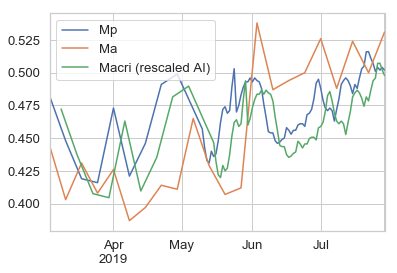

In [86]:
MI.plot()

In [88]:
csv = MI.dropna().round(3)
csv = csv.rename(columns={"Ma": "Macri (Positive Image from Elypsis)"})
csv["Fernandez (rescaled AI)"] = 1 - csv["Macri (rescaled AI)"]
csv["Fernandez (Positive Image from Elypsis)"] = 1 - csv["Macri (Positive Image from Elypsis)"]
csv = csv[["Fernandez (rescaled AI)", "Macri (rescaled AI)", "Fernandez (Positive Image from Elypsis)", "Macri (Positive Image from Elypsis)"]]
csv = csv.round(3)
csv.to_csv("web/data/2019-05-14/p1-f-positive.csv")